<a href="https://colab.research.google.com/github/SergioCuadrado08/PSD_Repository/blob/main/Expansion_Compresion_se%C3%B1ales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transformación y Reconstrucción de una Señal Senoidal en Señales y Sistemas  

En este experimento, aplicaremos transformaciones a una **señal senoidal** utilizando matrices de diferente tamaño, simulando efectos de **expansión de señales, compresión y reconstrucción**.  

##  **Pasos del experimento**  
1. **Generar una señal senoidal**
2. **Aplicar una transformación con matrices 75×50 y 50×75**:
   - La matriz **75×50** representa un sistema con **más salidas que entradas** (expansión de datos, MIMO).  
   - La matriz **50×75** representa un sistema con **menos salidas que entradas** (compresión de señal).  
3. **Reconstruir la señal** usando la **pseudo-inversa** para evaluar la pérdida de información.  

##  **Aplicaciones en Señales y Sistemas**  
- **Sistemas MIMO:** Expansión de datos en telecomunicaciones.  
- **Compresión de señales:** Reducción de datos, similar a transformaciones en audio o imágenes.  
- **Filtrado y recuperación de información:** Evaluación de pérdida de datos en transformaciones lineales.  


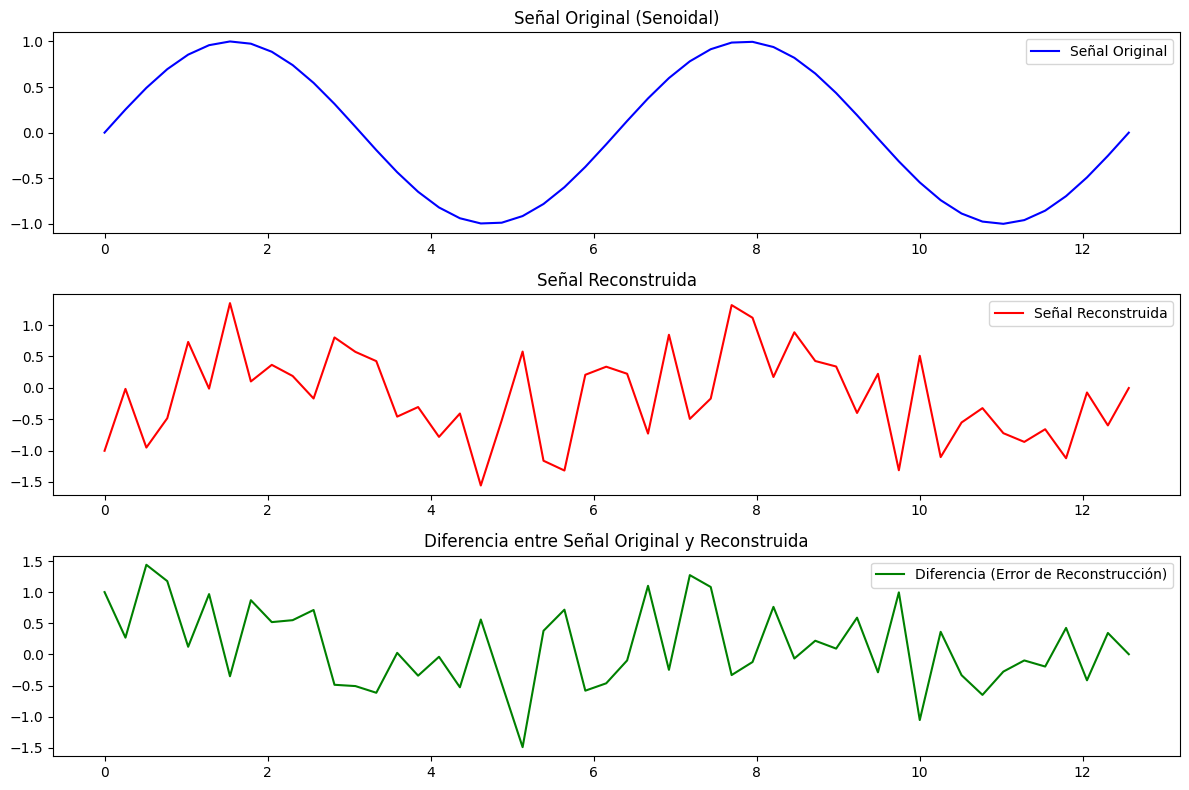

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Paso 1: Generar una señal senoidal con más muestras
n = np.linspace(0, 4 * np.pi, 50)
x = np.sin(n)  # Señal de entrada senoidal

# Representamos la señal como un vector columna
x = x.reshape(-1, 1)  # Convertimos en vector columna de tamaño (50,1)

# Paso 2: Transformación con matrices 75x50 y 50x75

# Matriz de transformación 75x50 (Expansión de datos, MIMO)
A1 = np.random.randn(75, 50)
y1 = np.dot(A1, x)  # Señal transformada 75x1

# Matriz de transformación 50x75 (Compresión de señal)
A2 = np.random.randn(50, 75)
y2 = np.dot(A2, y1)  # Señal transformada 50x1

# Paso 3: Reconstrucción de la señal

# Usamos la pseudo-inversa para reconstruir la señal
A2_pinv = np.linalg.pinv(A2)  # Pseudo-inversa de A2
y1_rec = np.dot(A2_pinv, y2)  # Recuperamos y1 aproximado

A1_pinv = np.linalg.pinv(A1)  # Pseudo-inversa de A1
x_rec = np.dot(A1_pinv, y1_rec)  # Recuperamos x aproximado

# Paso 4: Graficar señales

plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(n, x, 'b', label='Señal Original')
plt.legend()
plt.title("Señal Original (Senoidal)")

plt.subplot(3, 1, 2)
plt.plot(n, x_rec, 'r', label='Señal Reconstruida')
plt.legend()
plt.title("Señal Reconstruida")

plt.subplot(3, 1, 3)
plt.plot(n, x - x_rec, 'g', label='Diferencia (Error de Reconstrucción)')
plt.legend()
plt.title("Diferencia entre Señal Original y Reconstruida")

plt.tight_layout()
plt.show()
